In [20]:
import pandas as pd
import numpy as np
a=pd.read_csv('相对价值指标210221046/FI_T10.csv',encoding='gbk')
b=pd.read_csv('data/output/中国石化/bs_prices_600028.SH_with_year.csv')
c="中国石化"

In [21]:
# 筛选比亚迪每年年底的数据（Accper 以 12-31 结尾）
byd = a[a["ShortName"] == c].copy()
byd_year_end = byd[byd["Accper"].astype(str).str.endswith("12-31")]
byd_year_end[-10:]

,Stkcd,ShortName,Accper,Source,F100901A,F100902A,F100903A,F100904A
123905,600028,中国石化,2015-12-31,0,0.898761,0.956667,0.871730,0.927895
123909,600028,中国石化,2016-12-31,0,0.906501,0.965363,0.881537,0.938778
123913,600028,中国石化,2017-12-31,0,0.944643,1.011705,0.929863,0.995876
123917,600028,中国石化,2018-12-31,0,0.877940,0.944704,0.845351,0.909636
123921,600028,中国石化,2019-12-31,0,0.883871,0.947380,0.852866,0.914146
123925,600028,中国石化,2020-12-31,0,0.819750,0.882174,0.771624,0.830383
123929,600028,中国石化,2021-12-31,0,0.831260,0.891573,0.786207,0.843251
123933,600028,中国石化,2022-12-31,0,0.831291,0.889324,0.787336,0.842301
123937,600028,中国石化,2023-12-31,0,0.885080,0.953108,0.855583,0.921344
123941,600028,中国石化,2024-12-31,0,0.937684,1.007505,0.920312,0.988839


In [22]:
b

,year,bs_price
0,2015,3.552760e+11
1,2016,2.399132e+11
2,2017,3.316967e+11
3,2018,2.260026e+11
4,2019,2.307414e+11
5,2020,1.900081e+10
6,2021,9.112541e+09
7,2022,9.258924e+09
8,2023,1.224234e+11
9,2024,3.842301e+11


In [23]:
import scipy.stats as stats
import pandas as pd
# 1) 取比亚迪年末数据（近 11 期）
byd = a[a["ShortName"] == c].copy()
byd["Accper"] = pd.to_datetime(byd["Accper"])
byd_year_end = byd[byd["Accper"].dt.strftime("%m-%d") == "12-31"].tail(10)

# 2) 选择要对比的列（可改成 F100902A 等）
target_col = "F100901A"

# 3) 对齐长度并计算 Spearman 相关
bs = b["bs_price"].values
metric = byd_year_end[target_col].astype(float).values

if len(bs) != len(metric):
    raise ValueError(f"长度不一致：bs_price={len(bs)}，{target_col}={len(metric)}")

rho, pval = stats.spearmanr(bs, metric)
print(f"Spearman rho = {rho:.4f}, p-value = {pval:.4g}")

# 如需查看配对数据
paired = pd.DataFrame({"bs_price": bs, target_col: metric})
paired.to_csv(f"data/output/{c}/{c}_bs_vs_Q.csv", index=False)
paired

Spearman rho = 0.8667, p-value = 0.001174


,bs_price,F100901A
0,3.552760e+11,0.898761
1,2.399132e+11,0.906501
2,3.316967e+11,0.944643
3,2.260026e+11,0.877940
4,2.307414e+11,0.883871
5,1.900081e+10,0.819750
6,9.112541e+09,0.831260
7,9.258924e+09,0.831291
8,1.224234e+11,0.885080
9,3.842301e+11,0.937684


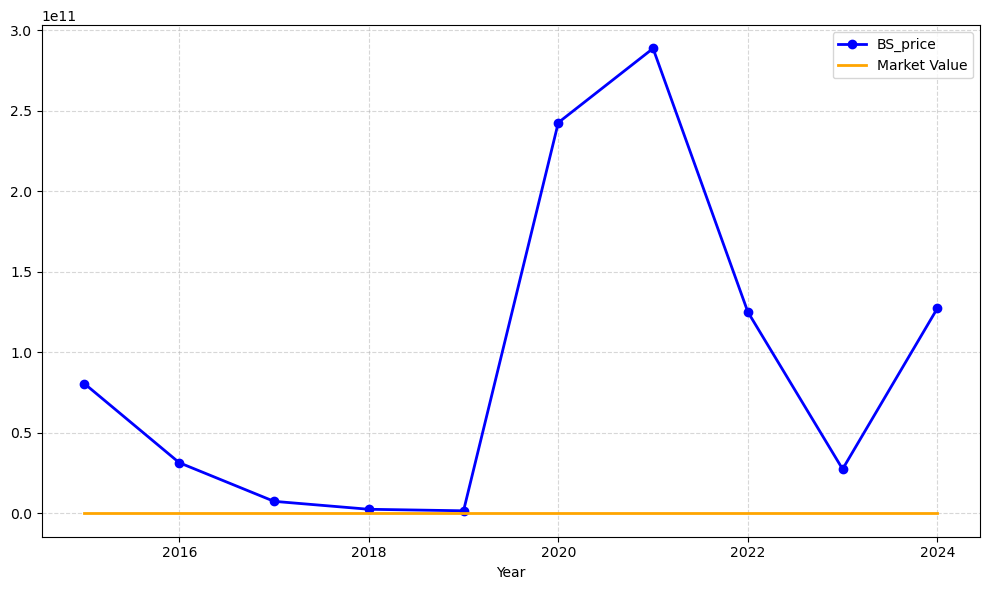

In [9]:
from matplotlib import pyplot as plt
import numpy as np
# 取对应的 11 期原始数据（用于年份和对比）

x = np.arange(2015, 2025)

# 可选：叠加原始 EV2 进行对比
bs_price = paired["bs_price"].values 
Q = paired["F100901A"].values 

plt.figure(figsize=(10, 6), dpi=100)

plt.plot(x, bs_price, 'b-o', label='BS_price', linewidth=2)
plt.plot(x, Q, 'orange', label='Market Value', linewidth=2)

#plt.title('Comparison')
plt.xlabel('Year' if isinstance(x[0], (np.integer, int)) else 'Index')
#plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig(f'./data/output/{company}/Comparison_{symbol}.png', dpi=400)
plt.show()
